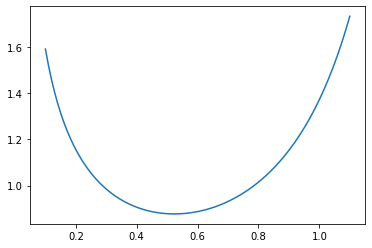

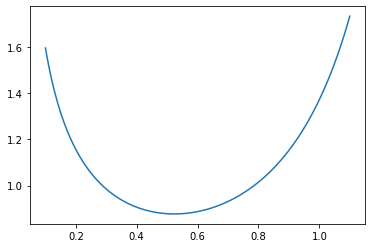

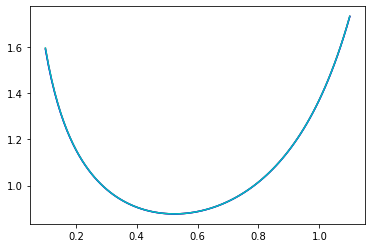

In [ ]:
# Derivacion, problema 8
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
#c)
x=np.linspace(0.1,1.1,100)
def sqrttan(x):
  return np.sqrt(np.tan(x))

def dprogresiva(x,sqrttan,h=0.01):
  return (1/(2*h))*(-3*sqrttan(x)+4*sqrttan(x+h)-sqrttan(x+2*h))

y=dprogresiva(x,sqrttan)
plt.plot(x,y)
plt.show()
#d)
def CentralDerivative(f,x,h):  
    d = 0.   
    if h != 0:
        d = (f(x+h) - f(x-h))/(2*h)
    return d
yy=CentralDerivative(sqrttan,x,h=0.01)
plt.plot(x,yy)
plt.show()
#e)
xx = sym.Symbol('x',real=True)
f=sym.sqrt(sym.tan(xx))
df=sym.diff(f,xx)
func = sym.lambdify([xx],df,'numpy')
resultados=func(x)
plt.plot(x,resultados,c='r')
plt.plot(x,y,c='b')
plt.plot(x,yy,c='c')
plt.show()

In [ ]:
#Integracion, problema 17

def gauss_integrate(n):
  f = lambda x: (x**3)/(1-np.exp(-x))
  Roots1, Weights1 = np.polynomial.legendre.leggauss(n)
  gauss_int=0
  for i in range(n):
    gauss_int +=  Weights1[i]*f(Roots1[i]) 
  return gauss_int
gauss_integrate(3)

<ipython-input-26-7518e04b6f9a>:4: RuntimeWarning: invalid value encountered in double_scalars
  f = lambda x: (x**3)/(1-np.exp(-x))


nan

In [ ]:
#Integracion, problema 17
def gauss_integrate(n):
  ## tu codigo aqui
  a = 0.
  b = 1
  f = lambda x: np.sin((100*x)**(1/2))**2
  n= n
  Roots1, Weights1 = np.polynomial.legendre.leggauss(n)
  t1 = 0.5*( (b-a)*Roots1 + a + b )
  gauss_int =  0.5*(b-a)*np.sum( Weights1*f(t1) )
  return gauss_int

In [ ]:
#Raices de Polinomios, problema 5
import sympy as sym
import numpy as np
x = sym.Symbol('x')
n = sym.Symbol('n', integer=True)
n=20

def rodrigues_laguerre(n):
    func = sym.exp(-x)*x**n
    dfunc = sym.diff(func, x, n)
    return sym.exp(x)/sym.factorial(n)*dfunc

Laguerre = []
DLaguerre = []

for i in range(n+1):
    
    Poly = rodrigues_laguerre(i)
    Laguerre.append(Poly)
    DLaguerre.append( sym.diff(Poly,x,1) )

def GetNewton(f,df,xn,itmax=100,precision=1e-14):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:

            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRoots(n,xn,Laguerre,DLaguerre):
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots
Raices=[]
for i in range(20):
  xn = np.linspace(0,50,100)
  Roots = GetAllRoots(i+1,xn,Laguerre,DLaguerre)
  Raices.append(Roots)
Raices

[array([1.]),
 array([0.58578644, 3.41421356]),
 array([0.41577456, 2.29428036, 6.28994508]),
 array([0.32254769, 1.7457611 , 4.5366203 , 9.39507091, 9.39507091]),
 array([ 0.26356032,  1.41340306,  3.59642577,  7.08581001,  7.08581001,
         7.08581001,  7.08581001, 12.64080084, 12.64080084, 12.64080084]),
 array([ 0.2228466 ,  1.1889321 ,  2.99273633,  2.99273633,  5.77514357,
         5.77514357,  5.77514357,  5.77514357,  9.83746742,  9.83746742,
         9.83746742, 15.98287398, 15.98287398, 15.98287398]),
 array([ 0.19304368,  1.0266649 ,  2.56787674,  2.56787674,  4.90035308,
         4.90035308,  8.18215344,  8.18215344,  8.18215344,  8.18215344,
         8.18215344,  8.18215344, 12.73418029, 19.39572786, 19.39572786,
        19.39572786, 19.39572786]),
 array([ 0.17027963,  0.90370178,  2.25108663,  2.25108663,  7.0459054 ,
         7.0459054 ,  7.0459054 ,  7.0459054 , 15.74067864, 15.74067864,
        15.74067864, 22.86313174, 22.86313174, 22.86313174, 22.86313174,
      

#Problema 1 interpolacion de Lagrange
Interpolación de lagrange:
1. Si se tiene un conjunto de puntos n+1 con coordenadas (x0,y0) (x1,y1), donde x0/=x1 y y0/=y1, y 2 polinomios P(x) G(x) que interpolan a estas 2 coordenadas.
Si se plantea otro polinomio R(x)=P(x)-G(x) y se evalua en xn siempre se obtendrá que R(xn)=0. 
Lo dicho anteriormente nos permite concluir que, si 2 polinomios interpolan los mismos puntos (en nuestro caso (x0,y0),(x1,y1) ), los 2 polinomios deben ser iguales. Entonces solo un único polinomio interpolador puede ser generado.

x*(0.363970234266202 - 0.0554912422401579*x)

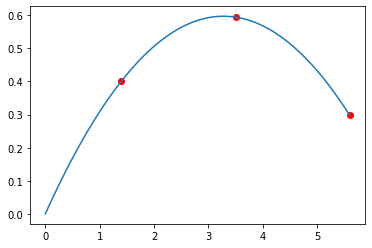

In [ ]:
#Problema 4 interpolacion de Lagrange
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym

X = np.array([1.4,3.5,5.6])
Y = np.array([0.4007954931819738,0.594128102489774,0.29802795523938164])

def Lagrange(x,xi,j):
    prod = 1.0
    n = len(xi)
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])    
    return prod

def Interpolate(x,xi,yi):
    Sum = 0.
    n = len(xi)
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
    return Sum

x=np.linspace(0,X[-1],100)
plt.scatter(X,Y,marker='o',color='r')

inter=Interpolate(x, X, Y)
plt.plot(x,inter)

x = sym.Symbol('x',real=True)

f = Interpolate(x,X,Y)
f = sym.simplify(f)
f

In [ ]:
# de las ecuaciones de cinematica obtenemos y=(tan(α))*x - (g/2v^2cos(α)^2)*x^2 , entonces
g=9.8
α=np.arctan(0.363970234266202)
print(α*180/np.pi)
v=np.sqrt(g/(0.0554912422401579*2*np.cos(α)**2))
print(v)

19.999999999999986
10.0


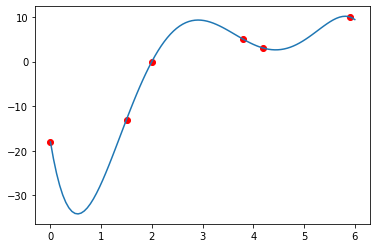

In [ ]:
#Problema 5 Interpolación de Lagranje
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0, 1.5, 2, 3.8, 4.2, 5.9])
y = np.array([-18, -13, 0, 5, 3, 10])
def diferencias(x, y):
    n = len(x)
    table = np.zeros([n, n])
    table[:,0] = y

    for j in range(1, n):
        for i in range(n-j):
            table[i][j] = (table[i+1][j-1] - table[i][j-1])/(x[i+j]-x[i])
    
    return table

def newton_gregory(x, y, x_interp):
    n = len(x)
    table = diferencias(x, y)

    interp = table[0][0]
    for j in range(1, n):
        b= 1
        for i in range(j):
            b *= (x_interp - x[i])
        interp += table[0][j]*b
    
    return interp

x_interp = np.linspace(0, 6, 100)
y_interp = [newton_gregory(x, y, x_i) for x_i in x_interp]

plt.plot(x_interp, y_interp, label='Interpolación')
plt.scatter(x, y, c='r')
plt.show()

# Problema 3 de Integración
Hacer los pasos intermedios para encontrar la regla de Simpson simple.
(en pdf)

In [ ]:
# Problema 3 de Integración
import sympy as sym
x = sym.Symbol('x')
h = sym.Symbol('h', integer=True)
fa = sym.Symbol('f(a)', integer=True)
fxm = sym.Symbol('f(Xm)', integer=True)
fb = sym.Symbol('f(b)', integer=True)
#  a=0 y b=h/2
#para hallar h/3
F1= ((x-h)*(x-2*h))/((0-h)*(0-2*h))
F1
I1= sym.integrate(F1,(x,0,2*h))
I1
#general
I2= fa+4*fxm+fb
It=I1*I2
It

h*(4*f(Xm) + f(a) + f(b))/3

In [ ]:
#Integracion problema 7
import numpy as np
import matplotlib.pyplot as plt
n=1000
x=np.linspace(-1,1,n)
y=np.linspace(-1,1,n)
A=(2/n)**2

def sphere(x,y):
  if -x**2-y**2 <-1:
    return 0
  else:
    return np.sqrt(1-(y**2)-(x**2))

def promedio_cuadrito(coor_x,coor_y):
  x1=sphere(x[coor_x],y[coor_y])
  x2=sphere(x[coor_x+1],y[coor_y])
  x3=sphere(x[coor_x],y[coor_y+1])
  x4=sphere(x[coor_x+1],y[coor_y+1])
  return (x1+x2+x3+x4)/4

volumen=0

for i in range(len(x)-1):
  for j in range(len(x)-1):
      volumen+=promedio_cuadrito(i,j)*A
    
volumen

2.0902053187444847

# Problema 14 de Integración
El problema está solucionado en el pdf del repositorio "Tarea 2"



In [ ]:
# Problema 18 de Integración
#1
import sympy as sym
import numpy as np
x = sym.Symbol('x')
n = sym.Symbol('n', integer=True)
N=20
print("PARTE 1 DEL PUNTO")
def rodrigues_Hermite(n):
    func = sym.exp(-x**2)
    dfunc = sym.diff(func, x, n)
    return (-1)**n*sym.exp(x**2)*dfunc
Hermite= []
DHermite = []

for i in range(N+1):
    
    Poly = rodrigues_Hermite(i)
    Hermite.append(Poly)
    DHermite.append( sym.diff(Poly,x,1) )

def GetNewton(f,df,xn,itmax=1000,precision=1e-15):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:

            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRoots(n,xn,Hermite,DHermite):
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots
Raices=[]


xn = np.linspace(-50,50,100)
Roots = GetAllRoots(20,xn,Hermite,DHermite)
Raices.append(Roots)
print("Las raices reales de los polinomios hasta grado 20 de Hermite son:")
print(Raices)
f=rodrigues_Hermite(19)
Hn=sym.lambdify(x,f,'numpy')
def GetWeights(Roots,Hn,n):
  lista=np.zeros(20)
  for i in range(len(Roots)):
    a= 2**(n-1)*np.math.factorial(n)*(np.pi)**(1/2)
    b= n**2*Hn(Roots[i])**2
    lista[i]=a/b
  return lista

Pesos = GetWeights(Roots,Hn,20)

print("Los pesos de los polinomios son:")
print(Pesos)

#2

Formula= lambda x: ((1/2**0.5)*(1/np.pi)**(0.25)*(np.exp((-x**2)/2)*2*x)*(x**2))

print("PARTE 2 DEL PUNTO")
from scipy import integrate
from scipy.integrate import quad
def integrand(integrand,offset):
  def dec(x):
    return integrand(x-offset)
  return dec
def quad1(func,a,b,midpoint=0.0,**kwargs):
  if midpoint != 0.0:
    func=integrand(func,-midpoint)
  return quad(func,a,b,**kwargs)
FormulaIntegrada=quad1(Formula,-np.inf,np.inf,midpoint=-1)
print(FormulaIntegrada)
   

PARTE 1 DEL PUNTO
Las raices reales de los polinomios hasta grado 20 de Hermite son:
[array([-5.38748089, -4.60368245, -1.23407622,  1.23407622,  4.60368245,
        5.38748089])]
Los pesos de los polinomios son:
[2.22939365e-13 4.39934099e-10 1.09017206e-01 1.09017206e-01
 4.39934099e-10 2.22939365e-13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
PARTE 2 DEL PUNTO
(1.1102230246251565e-16, 3.908711155501719e-09)


In [5]:
#Problema 19
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
a = -1
b = 1
Roots, Weights = np.polynomial.legendre.leggauss(34) 
Roots

M1 = np.linspace(1,20,10000)
I = np.zeros(10000)
t = 0.5*( (b-a)*Roots + a + b )
DT = (M1[0]-M1[1])*300*1.38*10**(-23)
Critico = 0

for i in range(1,10000):
    Function = lambda x:np.tanh(300*np.sqrt(x**2+(DT**2))/(2*M1[i]))/(np.sqrt(x**2+(DT**2)))
    Integral = np.sum(Weights*Function(t))/2
    I[i] = Integral
    
    if np.abs(Integral-(1/0.3)) < 1e-4:
        Critico = M1[i]
        
print(Critico)

12.127512751275129
